- $a_x, a_y, a_z$ - Raw acceleration measurements along each axis ($m/s^2$).
- $g_x, g_y, g_z$ - Raw gyroscope measurements about each axis ($deg/s)$, usually referred to as $p$, $q$, and $r$ respectively.
- $\phi$, $\theta$ – Roll angle (rotation about X axis in degrees) and pitch angle (rotation about Y axis in degrees).
- $\hat{\phi}$ – Indicates an estimate of the roll angle.


body to world:
$$
\left(\begin{array}{l}
\dot{\phi} \\
\dot{\theta} \\
\dot{\psi}
\end{array}\right)=\left(\begin{array}{ccc}
1 & \sin \phi \tan \theta & \cos \phi \tan \theta \\
0 & \cos \phi & -\sin \phi \\
0 & \sin \phi \sec \theta & \cos \phi \sec \theta
\end{array}\right)\left(\begin{array}{l}
p \\
q \\
r
\end{array}\right)
$$

## Complimentary Filter
互补滤波器的工作原理是将理想的加速度计低频特性与理想的陀螺仪高频特性相结合。

The method is as follows:
1. Choose a constant $\alpha$, such that $0 < \alpha < 1$. The larger $\alpha$, the more the accelerometer measurements are ‘trusted’. As $\alpha$ goes to zero, we base our estimate mainly on the gyroscope measurements. A good starting point is $\alpha = 0.1$.

2. Initialise state estimate, e.g. $\hat{\phi}_{t=0}=0$.

3. For each timestep (sampling time $\Delta t$):
    - Retrieve raw accelerometer and gyroscope readings from IMU.
    - Calculate estimate of angle from accelerometer data ($\hat{\phi}_{Acc}$) using equation from Section 2.2.
    - Combine this estimate with the integral of the transformed gyroscope data (see Section 2.3): $\hat{\phi}_{t+1}=(1-\alpha) \cdot (\hat{\phi}_{t}+ \dot{\phi}_G \cdot \Delta t)+\alpha \cdot \hat{\phi}_{Acc}$

In [63]:
import sys
sys.path.insert(0, '/opt/ros/noetic/lib/python3/dist-packages')
sys.path.insert(0, '..')

In [64]:
import rospy
import numpy as np
import visualiser
import matplotlib.pyplot as plt

from sensor_msgs.msg import Imu
from matplotlib.animation import FuncAnimation
from visualiser import IMULinearAclVisualiser, IMUAngularVelocityVisualiser, IMUVisualiser, IMUAccelerationVisualiser
from tf.transformations import quaternion_multiply, quaternion_inverse

In [66]:
class IMURos:
    def __init__(self) -> None:
        self.functions = []
        rospy.init_node('listener', anonymous=True)
        rospy.Subscriber("imu", Imu, self.imu_callback)

    def register(self, func):
        self.functions.append(func)

    def imu_callback(self, imudata):
        q = imudata.orientation
        w = imudata.angular_velocity
        a = imudata.linear_acceleration

        self._q = (q.x, q.y, q.z, q.w)
        self._w = (w.x, w.y, w.z)
        self._a = (a.x, a.y, a.z)
        for fun in self.functions:
            fun(self._q, self._w, self._a)

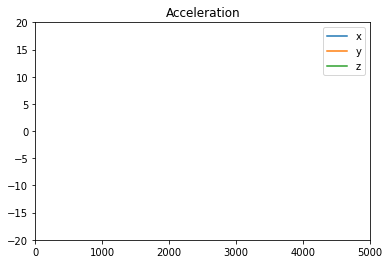

In [70]:
imu = IMURos()

acc_vis = IMUAccelerationVisualiser('Acceleration', y_lim=(-20, 20))
imu.register(acc_vis.imu_callback)

In [72]:
plt.show()

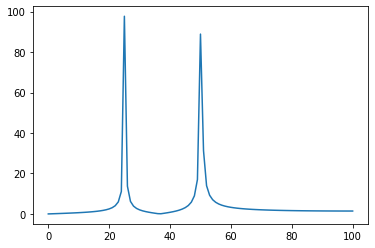

In [40]:

y = np.sin(np.linspace(0, 100*np.pi, 200)) + np.sin(np.linspace(0, 50*np.pi, 200))
freq = np.fft.rfftfreq(y.size, 1/200)
ap = np.fft.rfft(y)
plt.plot(freq, abs(ap))


In [73]:
a = np.array([1,2,3])
np.roll(a, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'roll'